In [271]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras import layers
from tensorflow.keras.callbacks import TensorBoard
sns.set_theme(style='white')
import datetime 
import pandas as pd

### Load Data Set 

In [184]:
def load_data(path):
    with np.load(path) as file:
        x_train, y_train = file['train_images'], file['train_labels']
        x_test, y_test = file['test_images'], file['test_labels']
        x_val, y_val = file['val_images'], file['val_labels']
        
        return (x_train, y_train), (x_test, y_test) , (x_val, y_val)
    
(x_train, y_train), (x_test, y_test),(x_val ,y_val)  = load_data('organamnist.npz')


### Data Set Description

In [185]:
## Data Set Dimensions
print('Image Dim: {} x {}'.format(x_train.shape[1],  x_train.shape[2]))
print('Training: {} / Validation: {} / Test: {} /Total: {}'.format(x_train.shape[0],x_val.shape[0],x_test.shape[0],np.sum([x_train.shape[0],x_val.shape[0],x_test.shape[0]])))

Image Dim: 28 x 28
Training: 34581 / Validation: 6491 / Test: 17778 /Total: 58850


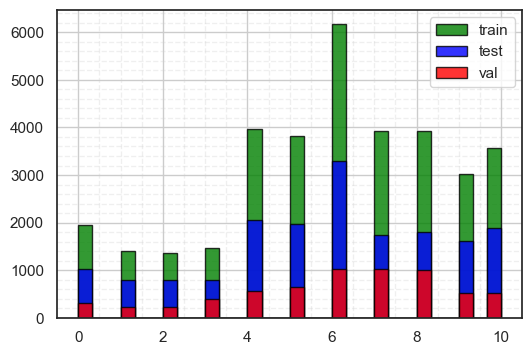

In [186]:
fig, ax = plt.subplots(figsize=(6,4))
c= ['green','blue','red']
label = ['train','test','val']
for idx ,a in enumerate([y_train, y_test,y_val]):
    ax.hist(a,color=c[idx],bins=30 ,label=label[idx],edgecolor='black',alpha=0.8)
    ax.grid(visible=True ,which='minor',linestyle='--',alpha=0.3)
    ax.minorticks_on()
    ax.grid()
plt.legend()

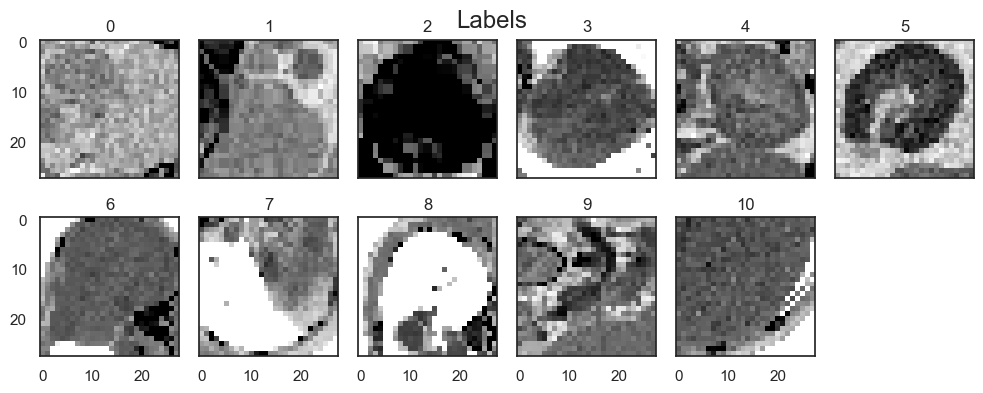

In [187]:
# plot first few images
valueList, indicesList = np.unique(y_test, return_index=True)
fig, ax = plt.subplots(2,6,figsize=(10,4),sharex=True ,sharey=True)
for i,idx in enumerate(indicesList):
    if i <=5:
        ax[0,i].imshow(x_test[idx], cmap=plt.cm.binary)
        ax[0,i].set_title(valueList[i])
    else:
        ax[1,i-6].imshow(x_test[idx], cmap=plt.cm.binary)
        ax[1,i-6].set_title(valueList[i])
        
ax[1,5].remove()      
plt.tight_layout()
fig.suptitle("Labels", fontsize="x-large")
plt.show()

In [238]:
X_train = x_train.reshape((-1, 28, 28, 1))
X_val = x_val.reshape((-1, 28, 28, 1))

## Model Evaluation

In [265]:
classifier = keras.Sequential(name='Ver1')
classifier.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))
classifier.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))
classifier.add(layers.Flatten())
classifier.add(layers.Dense(128, activation='relu'))
classifier.add(layers.Dense(11, activation='softmax'))

classifier.summary()

Model: "Ver1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 800)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               102528 

In [266]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1,write_images=True)

In [267]:
classifier.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [268]:
history=classifier.fit(X_train, y_train, batch_size=128, epochs=15, validation_split=0.1,callbacks=[tb_callback])

Epoch 1/15
244/244 [==============================] - 5s 21ms/step - loss: 1.5542 - accuracy: 0.6312 - val_loss: 0.5788 - val_accuracy: 0.8089
Epoch 2/15
244/244 [==============================] - 5s 20ms/step - loss: 0.4317 - accuracy: 0.8531 - val_loss: 0.3505 - val_accuracy: 0.8780
Epoch 3/15
244/244 [==============================] - 5s 20ms/step - loss: 0.2551 - accuracy: 0.9137 - val_loss: 0.2271 - val_accuracy: 0.9234
Epoch 4/15
244/244 [==============================] - 5s 20ms/step - loss: 0.1656 - accuracy: 0.9463 - val_loss: 0.1755 - val_accuracy: 0.9407
Epoch 5/15
244/244 [==============================] - 5s 20ms/step - loss: 0.1208 - accuracy: 0.9598 - val_loss: 0.1398 - val_accuracy: 0.9535
Epoch 6/15
244/244 [==============================] - 5s 20ms/step - loss: 0.0916 - accuracy: 0.9698 - val_loss: 0.1247 - val_accuracy: 0.9584
Epoch 7/15
244/244 [==============================] - 5s 20ms/step - loss: 0.0675 - accuracy: 0.9768 - val_loss: 0.1246 - val_accuracy: 0.9630

In [272]:
losses = pd.DataFrame(classifier.history.history)

In [275]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.554219,0.631226,0.578764,0.808904
1,0.431709,0.853062,0.350460,0.877999
2,0.255125,0.913727,0.227077,0.923388
3,0.165567,0.946340,0.175451,0.940734
4,0.120755,0.959803,0.139769,0.953455


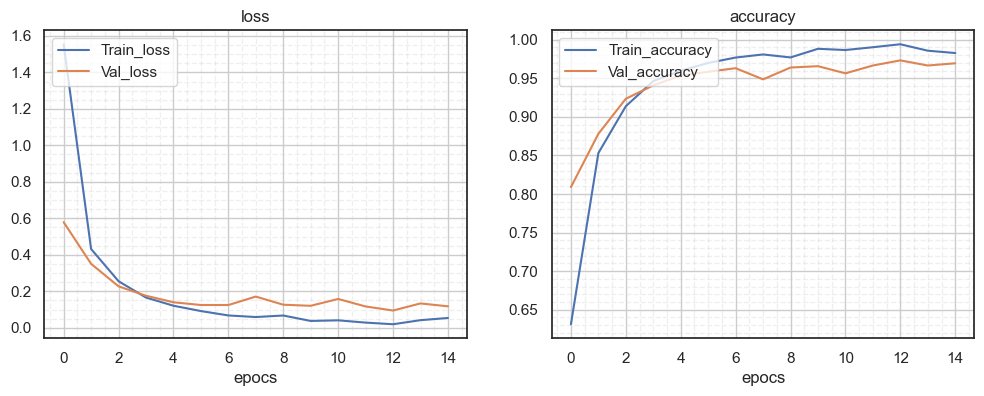

In [294]:
fig,axs =plt.subplots(1,2,figsize=(12,4))
axs[0].plot(losses[['loss','val_loss']],label=['Train_loss' ,'Val_loss'])
axs[1].plot(losses[['accuracy','val_accuracy']],label=['Train_accuracy' ,'Val_accuracy'])
title = ['loss','accuracy']
for i in range(2):
    axs[i].grid(visible=True ,which='minor',linestyle='--',alpha=0.3)
    axs[i].minorticks_on()
    axs[i].grid()
    axs[i].set_xlabel('epocs')
    axs[i].set_title(title[i])
    axs[i].legend(loc='upper left')
    

In [269]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4904), started 0:03:50 ago. (Use '!kill 4904' to kill it.)